In [11]:
ENV["GKS_ENCODING"] = "utf-8"
using Plots
include("src/ladderDGA_Julia.jl");

Inputs Read. Starting Computation                                          
Calculating bubble:   4.603095 seconds (82.64 M allocations: 2.503 GiB, 16.04% gc time)
Calculating naiive χ and γ in the charge channel:  22.401351 seconds (8.06 M allocations: 2.465 GiB, 2.08% gc time)
Calculating naiive χ and γ in the spin channel:  21.442721 seconds (6.66 M allocations: 2.397 GiB, 1.94% gc time)
Calculating λ correction in the charge channel:   1.401612 seconds (3.14 M allocations: 158.713 MiB, 7.13% gc time)
Calculating λ correction in the spin channel:   0.037838 seconds (540 allocations: 9.121 MiB, 45.31% gc time)
Calculating naiive Σ ladder:   1.770994 seconds (401.09 k allocations: 21.000 MiB)
Calculating χ and γ in the charge channel:  22.401529 seconds (8.25 M allocations: 3.345 GiB, 3.01% gc time)
Calculating χ and γ in the spin channel:  21.363575 seconds (6.92 M allocations: 3.280 GiB, 2.78% gc time)
Calculating Σ ladder:  43.744535 seconds (1.20 G allocations: 32.445 GiB, 26.06% 

# Improved Sums

## Motivation

Our goal is to find a good surrogate for the sum over infinitely many Matsubara frequencies, i.e. $\lim_{N \rightarrow \infty}\sum_{i\nu_{-N}}^{i\nu_{N}} f(\nu) \longrightarrow \lim_{N \rightarrow \infty} \text{S}_N[f(\nu)]$.
This operator $\text{S}$ can be defNined in different ways.
Here we will test two different approaches.

### Extrapolation approach

In order to quantify the error made by the finite approximation of the infinite sum, we first construct the following function:
$$
    g_\text{N} = \sum_{x = i \nu_{-N}}^{i \nu_{N}} f(x)
$$
We now want to extract the true limit of $N \rightarrow \infty$ from $g_\text{N}$.
For any finite summation we assume, that there error Terms fall of as $\sum_{i=1}^k \frac{c_i}{(i\nu_N)^i}$ with coefficients $c_i \in \mathbb{C}$.
We can therefore assume that the finite approximation of $g_\text{N}$ has a tail of the form 
$$
    S(j) = \lim_{N \rightarrow \infty} S_N(j) = \lim_{N \rightarrow \infty} \sum_{i=0}^N \frac{c_i}{(j)^i}
$$
It is clear that for $N \rightarrow \infty$, only $c_0$ survives and all other terms are artifacts of the finite approximation.
By fitting $S_N$ to the numerical data of $\tilde{f}_\text{N}$ we can determine the coefficients and extract the true value of the sum
$$
    \lim_{N \rightarrow \infty} g_\text{N} = c_0
$$


### Analytic tail approach

In cases in which we know the true tail of a function: $\lim_{n \rightarrow \infty} f(i \nu_n) = \sum_{i = 1}^N \frac{c_i}{i \nu_n}$ we can use this knowledge to improve convergence of a sum.
Note that $c_0 = 0$ in order for the sum to converge in the first place.
We write
\begin{align}
    \sum_{n} f(i \nu_n) & = \sum_{n} \left(f(i \nu_n) - \sum_{j = 1}^N \frac{c_j}{i \nu_n}\right) + \sum_{n}\sum_{j = 1}^N \frac{c_j}{i \nu_n}
\end{align}
The $\sum_{n}\sum_{j = 1}^N \frac{c_j}{i \nu_n}$ is analytically 

#### Fit to kinetic energy


We now use that the leading order of the $\chi$ tail is known to be $\frac{E_\text{kin}}{(i \omega_n)^2}$ (TODO: cite!).
This tail coefficient is subtracted, analytically summend and only the remaining higher order terms have to be fitted to real data.
\begin{align}
    \sum_{n= 1}^\infty \frac{2 E_\text{kin}}{(i \omega_n)^2}
     & = \sum_{n= 1}^\infty \frac{2 E_\text{kin}}{\left(i \frac{(2n) \pi}{\beta}\right)^2} \\
     & = \frac{ E_\text{kin} \beta^2}{- 2 \pi^2} \sum_{n= 1}^\infty \frac{1}{\left( n\right)^2} \\
     & = - \frac{E_\text{kin} \beta^2}{2 \pi^2} \left(
       \frac{\pi^2}{6}
     \right) \\
     & = - \frac{E_\text{kin} \beta^2}{12} 
\end{align}
This can be used to reduce the number of tail coefficients we need to fit:
\begin{align}
    \frac{1}{\beta} \sum_{n= -\infty}^\infty \chi (i \omega_n) 
           & =  \chi ( i \omega_0) + \frac{1}{\beta}  \sum_{n= \mathbb{N} \setminus \{ 0\}} \left( \chi (i \omega_n) - \frac{2 E_\text{kin}}{(i \omega_n)^2}  \right) +  \frac{1}{\beta} \sum_{n=\mathbb{N} \setminus \{ 0\} } \frac{2 E_\text{kin}}{(i \omega_n)^2} \\
        & \stackrel{\text{h.f.}}{=}  \chi (i \omega_0) + \frac{2}{\beta}  \sum_{n= 1 }^\infty \left( \chi (i \omega_n) + \frac{2 E_\text{kin}}{(i \omega_n)^2}  \right) -  \frac{E_\text{kin} \beta}{6} 
\end{align}


#### Kinetic energy from ED

We compute $E_\text{kin}$ from ED using 
\begin{align}
    E_\text{kin} & = \frac{1}{\beta} \sum_{k, n} \epsilon_k G(i  \nu_n, k) 
    = \frac{1}{\beta} \sum_{n} \Delta (i \nu_n) G_\text{IMP}(i \nu_n)\\
    \Delta(i \nu_n) & = \sum_l \frac{V_l^2}{i\nu_n - \epsilon_l}
\end{align}
For the $\nu_n$ sum we use the knowledge of the full tail:
\begin{align}
    \sum_{n=0}^\infty \Delta (i \nu_n) G_\text{IMP}(i \nu_n) = 
    \sum_{n} \left( \Delta (i \nu_n) G_\text{IMP}(i \nu_n) - \sum_k \frac{V_k^2}{(i\nu_n)^2} \right) + \sum_{n,k} \frac{V_k^2}{(i\nu_n)^2} 
\end{align}

Bath parameters are read from ``hubb.andpar`` and the impurity Greens function from ``gm_wim``


## Method for the analytical lsq fit of frequency sums 

It turns out, that the fitting procedure for the numerical data above is quite unstable. However, it is possible to compute the coefficients for the least squares fit (lsq fit) analytically i.e. with arbitrary precision. This approach will be discussed here. 
Our $n$ datapoints for the fit are given by $g_n$.

In order to minimize $\text{LSQ}(g_n) = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \left(S_n(j) - \left(g_{n}\right)_j\right)^2$
with the tail function for data points $g_j$
\begin{equation}
    S_n(j) = \sum_{k = 0}^n \frac{c_{k}}{j^k}
\end{equation}
$k, l$ are a running index for all elements of the set of coefficients $C$ with elements denoted by $c$.

We first construct 
$M_{kl} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{1}{j^k j^{l}}$
(derivation: minimize least squares sum analytically) and then for the $n$-th set of $j$ datapoints $\left(g_{n}\right)_j$:
\begin{equation}
\left(b_{n}\right)_{l} = \sum_{j=\nu\text{max}_\text{min}}^{\nu\text{max}_\text{max}} \frac{\left(g_{n}\right)_j}{j^d}
\end{equation}

We can then obtain the fit-coefficients $c_n$ of the $n$-th data point by solving $M c_n = b_n$

# Comparison $\chi_\text{Impurity}$ with  $\chi_\text{numerical}$

## general $\chi_{\sigma \sigma'}$ sums
 - Compute the naive sum $\chi^{\omega}_{\sigma \sigma', \text{naive}}$ as $\frac{1}{\beta^2} \sum_{\nu \nu'}\chi^{\omega \nu \nu'}_{\sigma \sigma'}$
 - Compute the fitted sum $\chi^{\omega}_{\sigma \sigma', \text{fit}}$ as $\frac{1}{\beta^2}  \text{FitSum}_{\nu \nu'}(\chi^{\omega \nu \nu'}_{\sigma \sigma'})$

TODO: CHI_ASYMP INCORRECT!!!

In [58]:
# load asymptotic data
asympt_vars = load(env.asymptVars);
χchAsympt = asympt_vars["chi_ch_asympt"];
χspAsympt = asympt_vars["chi_sp_asympt"];
χchED = asympt_vars["chi_ch_ED"];
χspED = asympt_vars["chi_sp_ED"];

In [60]:
env.inputDir

"../full_calc_001/data"

In [28]:
# naive:
χchED_ω_naive = sum(χchED,dims=[2,3])[:,1,1]/modelParams.β^2;
χspED_ω_naive = sum(χspED,dims=[2,3])[:,1,1]/modelParams.β^2;

# fit preparation:
nc = [0,1,2,3]
ωmax_end   = floor(Int64,size(χchED,1)/2)
start = ceil(Int64, (2/4)*ωmax_end)
W = build_weights(start, ωmax_end, nc)

# fit
χchED_ω_fit = approx_full_sum(χchED, W, modelParams, [2,3], fast=false)/(modelParams.β^2);
χspED_ω_fit = approx_full_sum(χspED, W, modelParams, [2,3], fast=false)/(modelParams.β^2);

# ed
χchAsympt = χchAsympt[1:floor(Int64,length(χchED_ω_naive)/2)]
χchAsympt = vcat(reverse(χchAsympt[2:end]), χchAsympt)
χspAsympt = χspAsympt[1:floor(Int64,length(χspED_ω_naive)/2)]
χspAsympt = vcat(reverse(χspAsympt[2:end]), χspAsympt);

### Comparison plots

78:160


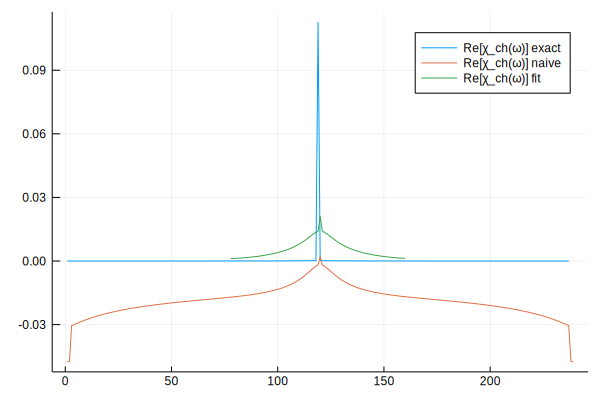

In [56]:
include("src/GFFit.jl")
usable_ch = find_usable_interval(real(χchED_ω_fit), reduce_range_prct=0.05)
println(usable_ch)
plot(real(χchAsympt)/modelParams.β, label="Re[χ_ch(ω)] exact")
plot!(real(χchED_ω_naive), label="Re[χ_ch(ω)] naive")
plot!(usable_ch, real(χchED_ω_fit[usable_ch]), label="Re[χ_ch(ω)] fit")

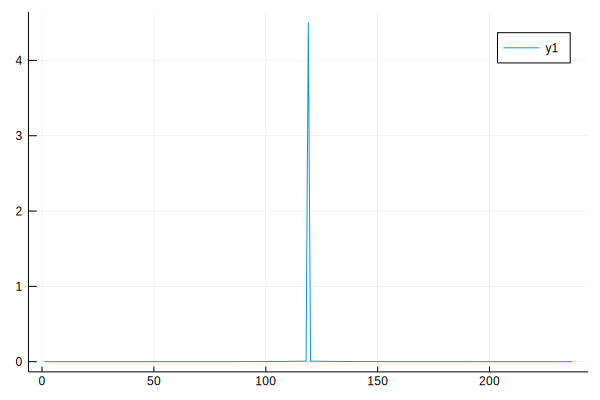

In [52]:
plot(χchAsympt)

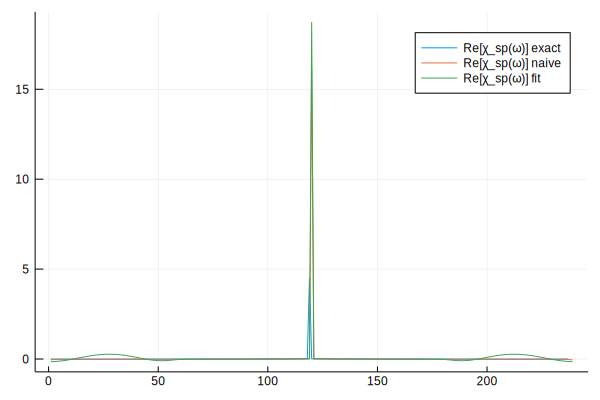

In [57]:
plot(real(χspAsympt), label="Re[χ_sp(ω)] exact")
plot!(real(χspED_ω_naive), label="Re[χ_sp(ω)] naive")
plot!(real(χspED_ω_fit), label="Re[χ_sp(ω)] fit")

 ## $\chi_{\uparrow \uparrow}$ and $\chi_{\uparrow \downarrow}$ sums 

We know that $\sum_\omega \chi_{\uparrow \uparrow}^\omega = \frac{n}{2} (1 - \frac{n}{2})$ and $\sum_\omega \chi_{\uparrow \downarrow}^\omega = \langle n_\uparrow n_\downarrow \rangle = \frac{n^2}{4}$
 
 - Compute naive and fitted sum for $\chi_{\uparrow \downarrow}$ and $\chi_{\uparrow \uparrow}$
 
For $\chi_{\uparrow \uparrow}$ we have knowledge of the tail and can therefore extend the analysis:

 - Compute the sum with tail correction $\chi^{\omega}_{\sigma \sigma', \text{limit}}$ as $\frac{1}{\beta^2}  \sum_{\nu \nu'}\left(\chi^{\omega \nu \nu'}_{\sigma \sigma'} - \frac{2 E_\text{kin}}{(i \omega_n)^2}  \right)  -  \frac{E_\text{kin} \beta}{6}  $
 - Compute the combination of both methods $\chi^{\omega}_{\sigma \sigma', \text{limit}}$ as $\frac{1}{\beta^2}  \text{FitSum}_{\nu \nu'}\left(\chi^{\omega \nu \nu'}_{\sigma \sigma'} - \frac{2 E_\text{kin}}{(i \omega_n)^2}  \right)  -  \frac{E_\text{kin} \beta}{6}  $
 - Read the exact $\chi^{\omega}_{\sigma \sigma'}$
 - compare all four variants to the exact solution

In [ ]:
# tail preparation
χ_upup_ED = copy(χEDch .+ χEDsp)
χ_updo_ED = copy(χEDch .- χEDsp)
iνₙ, GImp    = readGImp(env.inputDir * "/gm_wim")
ϵₖ, Vₖ, μ    = read_anderson_parameters(env.inputDir * "/hubb.andpar");
Ekin = real(compute_Ekin(iνₙ, ϵₖ, Vₖ, GImp, modelParams.β; full=true))
println("Ekin = $(Ekin)")
iωₙ2_full  = zeros(length(arr_ED))
for i in 1:length(arr_ED)
    iωₙ2_full[i] = (iω(i - ceil(Int64, length(arr_ED)/2)))^2
end
rem_full = Ekin*(modelParams.β*modelParams.β)/6
for n in 1:length(arr_ED)
    if n != ind_0
        χ_upup_ED[n] += 2*Ekin/iωₙ2_full[n]
        χ_updo_ED[n] += 2*Ekin/iωₙ2_full[n]
    end
end

# tail subtracted sum

# combination of both
χchED_ω_both = approx_full_sum(χchED, W, modelParams, [2,3], fast=false)/modelParams.β  + rem_full/(modelParams.β)
χspED_ω_both = approx_full_sum(χspED, W, modelParams, [2,3], fast=false)/modelParams.β  + rem_full/(modelParams.β)


# Test $\chi_\text{lDGA}$  

## Physical properties
We expect $\frac{1}{2 \beta} \sum_{q,\omega} \left( \chi^\text{ch}(q, \omega)_\text{lDGA} + \chi^{\text{sp}, \lambda}_\text{lDGA}(q, \omega) \right) = n (n-1) = \frac{1}{4}$
From the first section we assume, that the nubmer of coefficients should be set to $5$ and $\nu maxstart$ should be in the last $20 \%$ of the tail.

We start by computing the $\nu, \nu'$ sum over $\chi^\text{sp}$ and $\chi^\text{ch}$.
The correct tail behaviour is checked by plotting both functions as a function of $\omega$.  
  
  - Test $\sum \chi_q^\omega$  
  - Test $\sum \chi_{q,\lambda}^\omega$  
  

# Test $\Sigma(k,\nu)$

### Investigation of noisy data for $\Sigma$
We inject Gaussian noise into each of the inputs of $\Sigma ( \gamma_{ch}, \gamma_{sp},\chi_{ch}, \chi_{sp}, \chi_0, F_{\uparrow \downarrow}, G(\nu_n + \omega_n))$ in order to investigate the sensitivity of $\Sigma$ to faulty input data.

In [111]:
using Random
using Statistics
using Plots
include("src/ladderDGATools.jl")
noiseFlags = [1,0,0,0,0,0,0]
Σ_Noise_01 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [1,0,0,0,0,0,0]);
Σ_Noise_02 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,1,0,0,0,0,0]);
Σ_Noise_03 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,1,0,0,0,0]);
Σ_Noise_04 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,1,0,0,0]);
Σ_Noise_05 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,0,1,0,0]);
Σ_Noise_06 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,0,0,1,0]);
Σ_Noise_07 = calc_DΓA_Σ_noise(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
    qMultiplicity, qGrid, kGrid, modelParams, simParams, [0,0,0,0,0,0,1]);

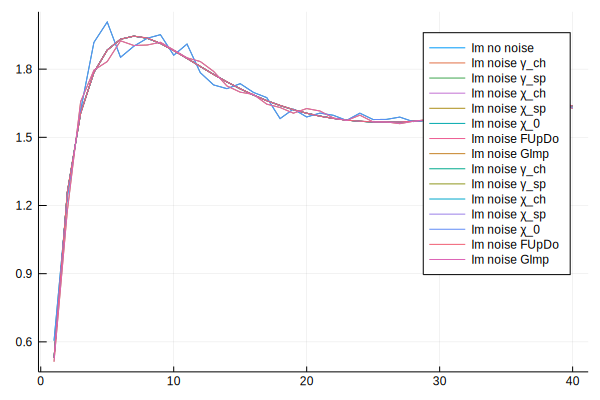

In [127]:
plot(imag(Σ_ladder[1,:]), label="Im no noise")
plot!(imag(Σ_Noise_01[1,:]), label="Im noise γ_ch")
plot!(imag(Σ_Noise_02[1,:]), label="Im noise γ_sp")
plot!(imag(Σ_Noise_03[1,:]), label="Im noise χ_ch")
plot!(imag(Σ_Noise_04[1,:]), label="Im noise χ_sp")
plot!(imag(Σ_Noise_05[1,:]), label="Im noise χ_0")
plot!(imag(Σ_Noise_06[1,:]), label="Im noise FUpDo")
plot!(imag(Σ_Noise_07[1,:]), label="Im noise GImp")

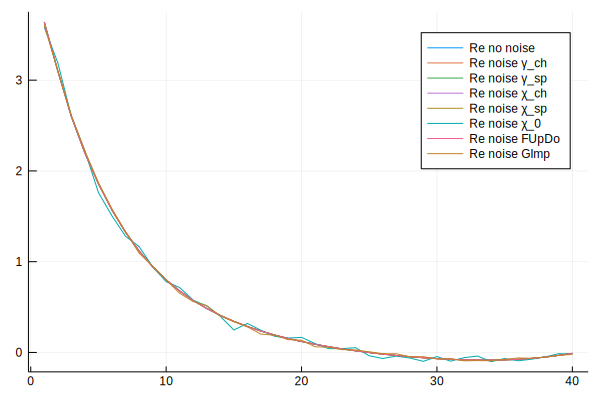

In [113]:
plot(real(Σ_ladder[1,:]), label="Re no noise")
plot!(real(Σ_Noise_01[1,:]), label="Re noise γ_ch")
plot!(real(Σ_Noise_02[1,:]), label="Re noise γ_sp")
plot!(real(Σ_Noise_03[1,:]), label="Re noise χ_ch")
plot!(real(Σ_Noise_04[1,:]), label="Re noise χ_sp")
plot!(real(Σ_Noise_05[1,:]), label="Re noise χ_0")
plot!(real(Σ_Noise_06[1,:]), label="Re noise FUpDo")
plot!(real(Σ_Noise_07[1,:]), label="Re noise GImp")

### Investigation of sum fits for $\Sigma$

The internal sums to compute $\Sigma$ are formally defined over infinitely many Matsubara frequencies.
We want to investigate the usefulness of the previously discussed methods in this context.

In [ ]:
include("src/GFFit.jl")
include("src/ladderDGATools.jl")
@time Σ_ladder = calc_DΓA_Σ(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
                    qMultiplicity, qGrid, kGrid, modelParams, simParams);
@time Σ_ladder_impr1,Σ_ladder_impr2,tmp = calc_DΓA_Σ_impr(χch, χsp, trilexch, trilexsp, bubble, Σ_loc, FUpDo,
                    qMultiplicity, qGrid, kGrid, modelParams, simParams);

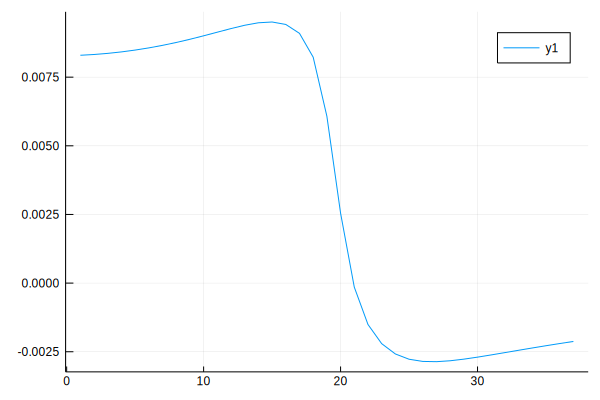

In [97]:
plot(real(tmp[:]))

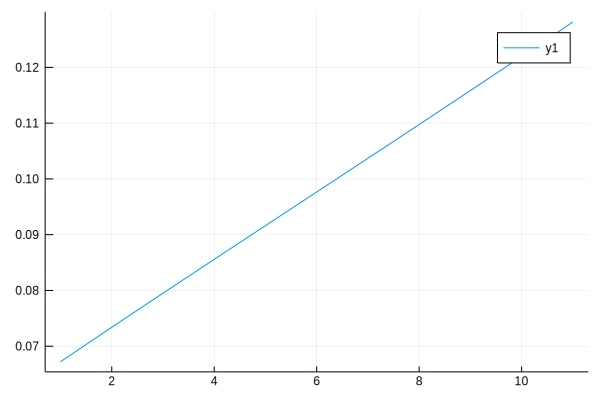

In [104]:
cut = 0
numin = Int(floor((length(tmp)-cut)*3/4))
numax = Int(floor(length(tmp))-cut)
W2 = build_weights(numin, numax, [0,1,2,3])
plot(real(build_fνmax(tmp, W2, [1])))

In [61]:
maximum(abs.(Σ_ladder_impr1 .- Σ_ladder_impr2))

5.184724718755054

In [37]:
size(Σ_ladder_impr2)

(40,)

In [106]:
size(Σ_ladder)

(55, 40)

In [107]:
println(maximum(abs.(Σ_ladder .- Σ_ladder_impr)))

4.204945466039917


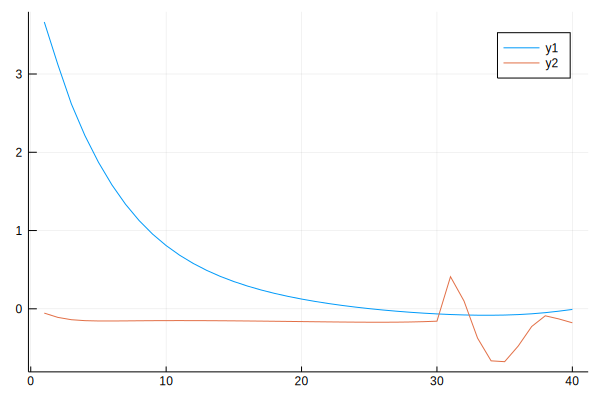

In [103]:
plot(real(Σ_ladder[end,:]))
plot!(real(Σ_ladder_impr[end,:]))

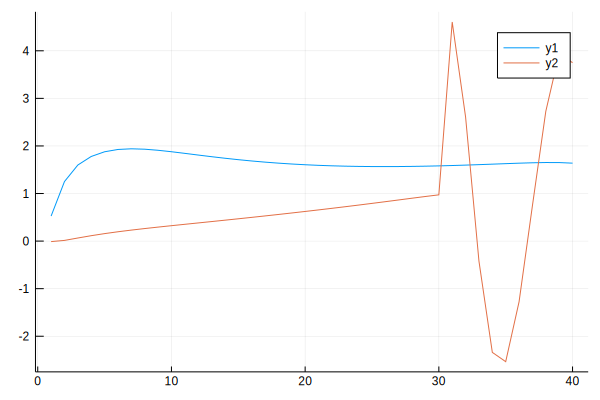

In [93]:
plot(imag(Σ_ladder[end,:]))
plot!(imag(Σ_ladder_impr[end,:]))

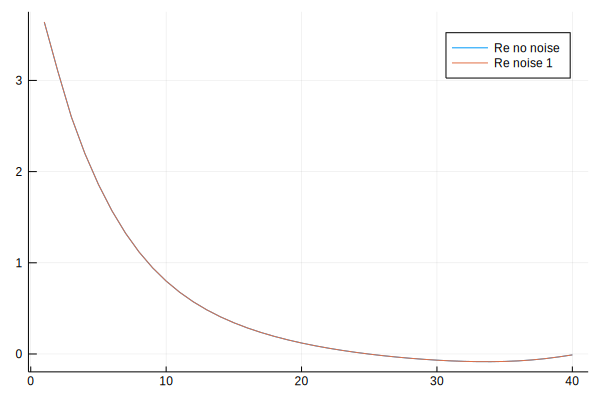

In [40]:
plot(real(Σ_ladder[1,:]), label="Re no noise")
plot!(real(Σ_Noise_01[1,:]), label="Re noise 1")

### Compare naive vs. fit

In [2]:
#plot(real(Σ_ladder[1,:]), label="Re naive")
plot(imag(Σ_ladder[1,:]), label="Im naive")
#plot!(real(Σ_ladder_impr[1,:]), label="Re χImpr Σnaive")
plot!(imag(Σ_ladder_impr[1,:]), label="Im χImpr Σnaive")

UndefVarError: UndefVarError: plot not defined

### Compare to $\Sigma_\text{loc}$